Epoch [0/5000], Loss: 0.17060509324073792
Epoch [500/5000], Loss: 3.746282163774595e-05
Epoch [1000/5000], Loss: 7.139647806297944e-08
Epoch [1500/5000], Loss: 7.139635727071436e-08
Epoch [2000/5000], Loss: 7.139600910477384e-08
Epoch [2500/5000], Loss: 7.139667701494545e-08
Epoch [3000/5000], Loss: 7.139567514968803e-08
Epoch [3500/5000], Loss: 7.139576041481632e-08
Epoch [4000/5000], Loss: 7.139617252960306e-08
Epoch [4500/5000], Loss: 7.139590962879083e-08


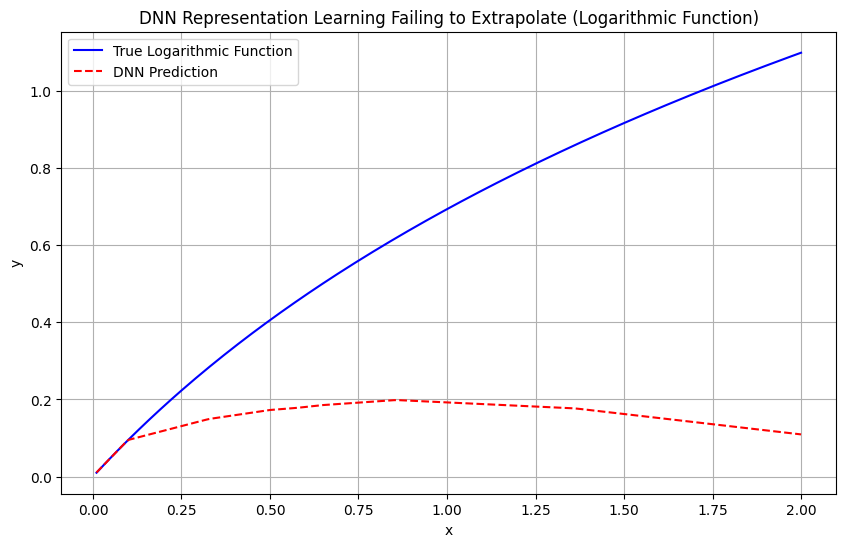

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# logarithmic function
def true_function(x):
    return np.log(x + 1)

# training data: only near 0
x_train = torch.linspace(0.01, 0.1, 100).reshape(-1, 1)
y_train = torch.tensor(true_function(x_train.numpy()), dtype=torch.float32).reshape(-1, 1)


class DNNRepresentationLearning(nn.Module):
    def __init__(self):
        super(DNNRepresentationLearning, self).__init__()
        self.fc1 = nn.Linear(1, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = DNNRepresentationLearning()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 5000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item()}")

x_test = torch.linspace(0.01, 2, 200).reshape(-1, 1)  # Testing on values far from 0
y_test = torch.tensor(true_function(x_test.numpy()), dtype=torch.float32).reshape(-1, 1)


with torch.no_grad():
    y_pred = model(x_test)


plt.figure(figsize=(10, 6))
plt.plot(x_test.numpy(), y_test.numpy(), label="True Logarithmic Function", color='blue')
plt.plot(x_test.numpy(), y_pred.numpy(), label="DNN Prediction", color='red', linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.title("DNN Representation Learning Failing to Extrapolate (Logarithmic Function)")
plt.legend()
plt.grid(True)
plt.show()
